In [1]:
try:
    import Image
except ImportError:
    from PIL import Image
import glob

import matplotlib, cv2
import numpy as np
import matplotlib.pyplot as plt

import re
import math

In [3]:
data_path = "../testimages/"
images = glob.glob(data_path+'ff*.png')

In [44]:
def show_img(img, gray=False):
    plt.figure(figsize=(10,10))
    if (gray):
        plt.imshow(img, 'gray')
    else:
        plt.imshow(img)
        
def gray(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def get_scoreboard(img):
    # converts a 2560 x 1366 image into a 904 x 271 scoreboard
    return img[1086:1356, 837:1740, :]

In [45]:
print(images)

['../testimages\\ff10.png', '../testimages\\ff11.png', '../testimages\\ff12.png', '../testimages\\ff13.png', '../testimages\\ff14.png', '../testimages\\ff15.png', '../testimages\\ff16.png', '../testimages\\ff17.png', '../testimages\\ff18.png', '../testimages\\ff19.png', '../testimages\\ff8.png', '../testimages\\ff9.png']


In [55]:
### just grab one to test
curr_img = images[0]

In [47]:
img = get_scoreboard(cv2.imread(curr_img))

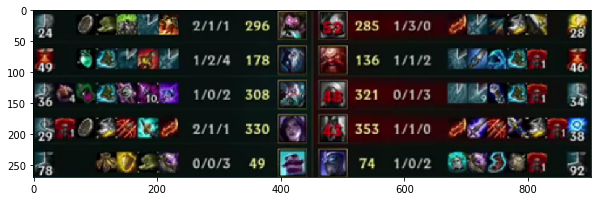

In [48]:
#### convert image to RGB color for matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

### show image with matplotlib
plt.figure(figsize=(10,10))
plt.imshow(img)

In [49]:
### get portraits for each champion
def get_team1_portraits(scoreboard):
    pic0 = scoreboard[4:46, 399:441, :]
    pic1 = scoreboard[60:102, 399:441, :]
    pic2 = scoreboard[116:158, 399:441, :]
    pic3 = scoreboard[172:214, 399:441, :]
    pic4 = scoreboard[228:272, 399:441, :]
    return [pic0, pic1, pic2, pic3, pic4]

def get_team2_portraits(scoreboard):
    pic0 = scoreboard[4:46, 465:507, :]
    pic1 = scoreboard[60:102, 465:507, :]
    pic2 = scoreboard[116:158, 465:507, :]
    pic3 = scoreboard[172:214, 465:507, :]
    pic4 = scoreboard[228:272, 465:507, :]
    return [pic0, pic1, pic2, pic3, pic4]

(42, 42, 3)


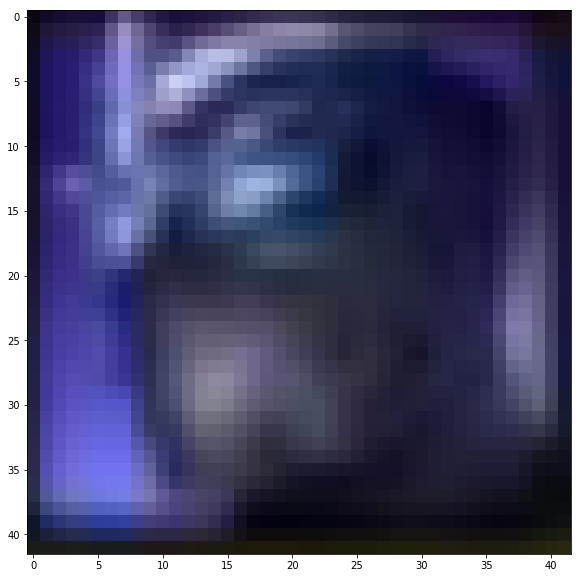

In [50]:
team2_portraits = get_team2_portraits(img)
show_img(team2_portraits[4])
print(team2_portraits[4].shape)

In [51]:
portraitslist = glob.glob('../data/portraits/*.png')

portraits = {}

### store all the official Riot portraits (that we downloaded) in a dictionary
for portrait in portraitslist:
    match = re.search('(\w+).png', portrait)
    if match:
        name = match.group(1)
    pic = cv2.imread(portrait)
    portraits[name] = pic

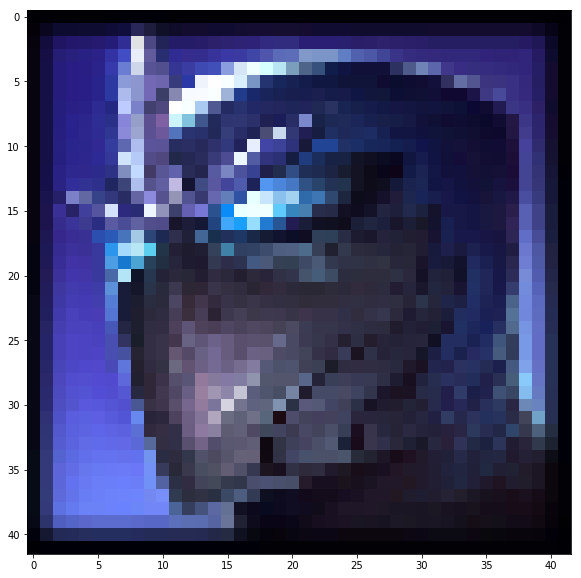

In [52]:
size = 42, 42

### resize all these portraits
for key, value in portraits.items():
    value = value[1:119, 2:119, :]
    portraits[key] = cv2.resize(value, size, cv2.INTER_AREA)
    portraits[key] = cv2.cvtColor(portraits[key], cv2.COLOR_BGR2RGB)
    
show_img(portraits['Shen'])

In [53]:
def get_champion_name(portrait):
    # use distance metric to find the most likely champion
    min_dist = 15000.0
    min_key = ''

    for key in portraits:
        ref = portraits[key].astype(np.int8)
        screen = portrait.astype(np.int8)
        dist = np.linalg.norm(ref - screen)
        if dist < min_dist:
            min_key = key
            min_dist = dist
#             print(min_dist)

    return min_key

Shen


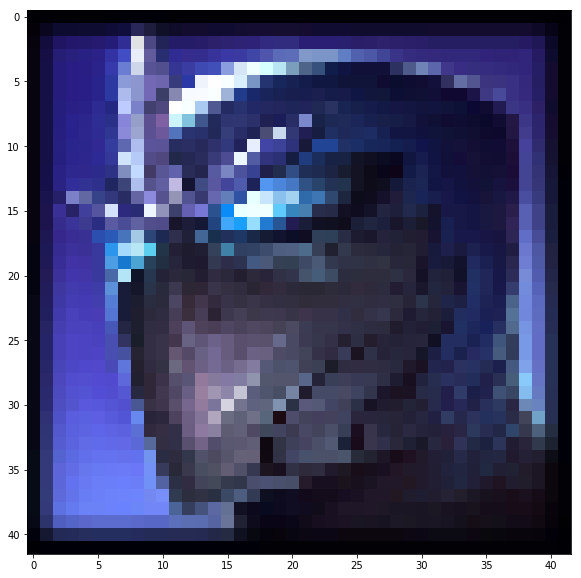

In [54]:
shen = get_champion_name(team2_portraits[4])
print(shen)
show_img(portraits[shen])